<a href="https://colab.research.google.com/github/starboysfy/thesis/blob/master/HW3%264.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**HW 3: PyTorch**
# **CSCI 5525: Machine Learning**

Most of the problems here are relatively straight forward and constitute learning exercises--their purpose is to get you acquainted with the framework. 
Do them from scratch and you'll learn a lot. I want you to get more familiar with the PyTorch documentation that you can find at https://pytorch.org/docs/stable/index.html


#Preliminaries

In [ ]:
# Preliminaries[]
## Standard libraries
import os
import json
import math
import numpy as np
import time

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgb
import matplotlib
matplotlib.rcParams['lines.linewidth'] = 2.0
import seaborn as sns
sns.reset_orig()
sns.set()

## Progress bar
from tqdm.notebook import tqdm

## PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim
# Torchvision
import torchvision
from torchvision.datasets import FashionMNIST
from torchvision import transforms

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print(device)


#Cheatsheets


see 

https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html

https://pytorch.org/tutorials/beginner/ptcheat.html
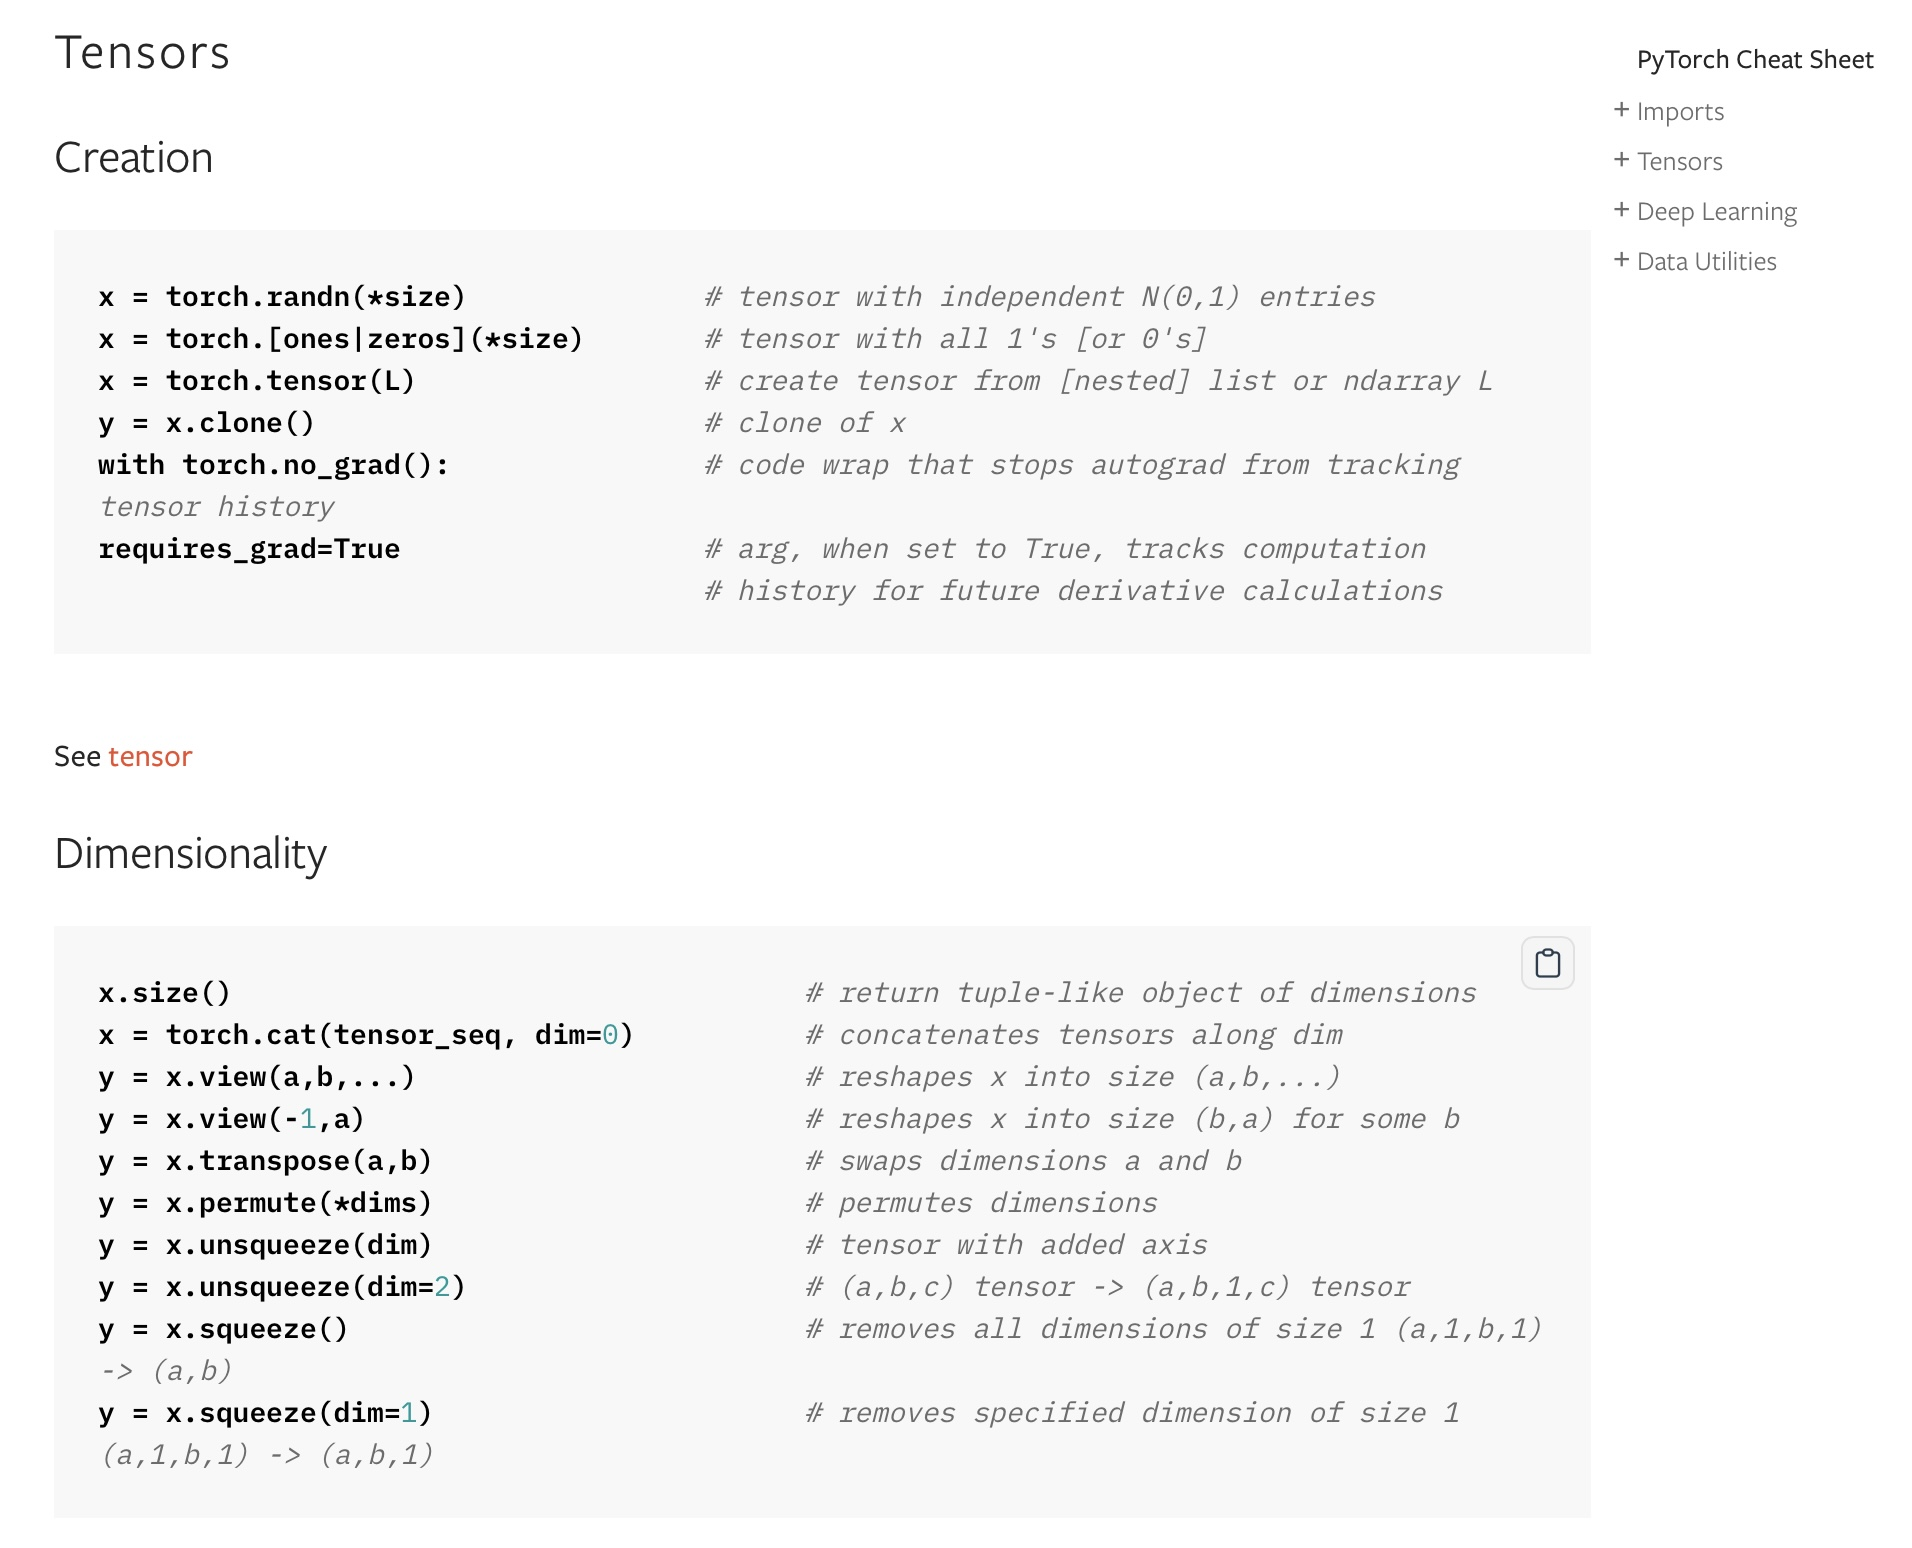

#Problem 1 (20 points) 
Complete the code in template form.



In [ ]:
"""
Simple Pytorch exercises

You should thoroughly test your code
"""

###############################################################################
# 1a: Create two random 0-d tensors x and y that are Gaussian distributed, zero mean unit variance.
# Create a Pytorch object that returns x + y if x > y, and x - y otherwise.
# hint: think numpy
###############################################################################
#radn allows us to grab a random number from the standard normal distribution with mean 0 and variance 1.
print("Problem 1a:\n")

# YOUR CODE HERE

###############################################################################
# 1b: Create two 0-d tensors x and y randomly selected from the range [-1, 1).
# Return x + y if x < y, x - y if x > y, 0 otherwise.
###############################################################################
print("\n\n\nProblem 1b:\n")

# YOUR CODE HERE

###############################################################################
# 1c: Create the tensor x of the value [[0, -2, -1], [0, 1, 2]]
# and y as a tensor of zeros with the same shape as x.
# Return a boolean tensor that yields Trues if x equals y element-wise.
# Hint: Look up tf.equal().
###############################################################################
print("\n\n\nProblem 1c:\n")
import tensorflow as tf

# YOUR CODE HERE

###############################################################################
# 1d: Create the tensor x of value
# [29.05088806,  27.61298943,  31.19073486,  29.35532951,
#  30.97266006,  26.67541885,  38.08450317,  20.74983215,
#  34.94445419,  34.45999146,  29.06485367,  36.01657104,
#  27.88236427,  20.56035233,  30.20379066,  29.51215172,
#  33.71149445,  28.59134293,  36.05556488,  28.66994858].
# Get the indices of elements in x whose values are greater than 30.
#
###############################################################################
print("\n\n\nProblem 1d:\n")
x = torch.tensor([29.05088806,  27.61298943,  31.19073486,  29.35532951,
  30.97266006,  26.67541885,  38.08450317,  20.74983215,
  34.94445419,  34.45999146,  29.06485367,  36.01657104,
  27.88236427,  20.56035233,  30.20379066,  29.51215172,
  33.71149445,  28.59134293,  36.05556488,  28.66994858])
for value in range(len(x)):
    if(x[value] > 30):
        print(x[value], value)
# YOUR CODE

###############################################################################
# 1e: Create a diagnoal 2-d tensor of size 6 x 6 with the diagonal values of 1,
# 2, ..., 6
###############################################################################
print("\n\nProblem 1e:\n")

# YOUR CODE HERE

###############################################################################
# 1f: Create a random 2-d tensor of size 10 x 10 from any distribution.
# Calculate its determinant.
# Hint: Look at torch.det().
# see https://pytorch.org/docs/stable/torch.html?highlight=mm#math-operations
###############################################################################
print("\n\nProblem 1f:\n")

# YOUR CODE HERE

###############################################################################
# 1g: Create tensor x with value [5, 2, 3, 5, 10, 6, 2, 3, 4, 2, 1, 1, 0, 9].
# Return the unique elements in x
# Hint: use torch.unique(). 
###############################################################################
print("\n\nProblem 1g:\n")

# YOUR CODE HERE

###############################################################################
# 1h: Create two tensors x and y of shape 300 x 1 from any normal distribution,
# as long as they are from the same distribution. Compute
# the mean squared error of (x - y) 
###############################################################################
print("\n\nProblem 1h:\n")

# YOUR CODE HERE

#Problem 2 (20 points) 
Complete a basic logistic regression analysis of the MNIST dataset by finishing the code below. 

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter # TensorBoard support

# default tensorboard `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/mnist_experiment_1')

# load the data
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)
from torch.utils.data import DataLoader
# set up a data loader
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)



In [ ]:
# STEP 1: set up your model
#  our images are not in the right shape for a simple linear layer (why?) but we can reshape them using nn.Flatten, then use a linear layer
#input_dim = 724
input_dim = 784
output_dim = 10
data_inputs, data_labels = next(iter(train_dataloader))
#print("Shape: ", {data_inputs.shape})
#print("Data: ", {data_inputs})
#print(data_inputs[0])

# Define a network that has two layers, Flatten, then Linear. Flatten reshapes images to vectors
# Also initialize weights: set the weights according to Xavier scaling
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        m = nn.Flatten() 
        cleaned_data = m(data_inputs) #Flatten from [64, 1, 28 ,28] to [64, 784]
        #print(len(cleaned_data))
        #print("Shape: ", {cleaned_data.shape})

        # initialize here
        # YOUR CODE HERE

    def forward(self, x):    
      # layers here
      # YOUR CODE HERE
      return x

# STEP 2:
# instantiate your network and use a cross entropy loss and set up your optimizer.  Use ADAM with defaults
net = Net()
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.1)

# STEP 3:
# train your model
# YOUR CODE HERE








# STEP 4: 
# test your model and compute error rate
# YOUR CODE HERE






#STEP 5:
# visualize results using Tensorboard
# YOUR CODE HERE



#Problem 3 (20 points): Visualize problem 1 results using Tensorboard

Directions: Adapt the tutorial here https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html
to add tensorboard hooks to your model from problem 1.  Visualize the graph and the performance as in the tutorial.  You can skip visualizing the images if you want to save time.

#Problem 4 (20 points): Redo problem 1 using a modified network

* Replace original network with a the following sequence of layers
** Conv2d, Relu, Batchnorm2d, Conv2d, Relu, Batchnorm2d

* Train and test and compare results.  Parameters are for you to set as you like, try to make sure you beat the Problem 1 performance.


#Homework 4 (100 points)
The goal of this homework is get practice doing Machine Learning comparisons.  

## Background
Machine Learning methods have numerous trade-offs in terms of the amount of data needed, how well data has been prepared, the complexity of the model, and even the framework used to compute the model.  Deep learning has provided state-of-the-art solutions in domains with massive data and extensive background engineering on input representations, like text and image data (NLP and Computer Vision have long and interesting histories).  Deep learning solutions in these domains have revolved around finding computing architectures that implement and extend the rich set of pre-existing ideas.  Other problems like time series forecasting and tabular data have proven much more difficult to tackle with the same methods. These problems are largely characterized by the need to extrapolate (time series forecasting) or highly non-vectorial data (categorical features, sequences of discrete events).  

Extrapolation is formally hard for deep learning methods trained with stochastic gradient descent.  For ReLU MLPs, it has recently been proven that the networks extrapolate linearly, despite the capacity to create highly complex non-linear interpolation functions.  As results from the Neural Tangent Kernel approach and multiple other parallel theoretical works demonstrate, DL methods are kernel machines - training data thus embedded as examplars that new inputs are interpolated against.  This motivates using **structured training sets** that attempt to span the space of likely inputs, and is one of the most important preprocessing steps for image-based DL systems (transforming training data by rotating, cropping, scaling, flipping, etc.).  For tabular data, the common preprocessing step of using one-hot representations is well known to perform poorly in many tasks.  For decision trees, one-hot encoding provably increases the depth of a tree needed to solve a task, and this added complexity likely penalizes DL systems relying on this coding strategy.  

Because most machine learning projects in industry require integrating multiple kinds of input data (text, image, media, complex tabular), it is important to understand how these issues affect processing.  While DL systems can often be carefully tailored to win a contest, for production the additional complexity and poor transfer generalization can deeply hurt a system.  The most important lessons from the last few years have been

1. **Preprocessing matters**🇰In fact, there's a whole book on it! http://www.feat.engineering 
  - Feature engineering alone can win contests, for example: https://medium.com/rapids-ai/winning-solution-of-recsys2020-challenge-gpu-accelerated-feature-engineering-and-training-for-cd67c5a87b1f. Here the winning solution heavily depended on recognizing that key categorical variables should ratio, difference and transform encoded.  These very simple transformations are extremely natural when doing statisical modeling.  Recoding two event counts as a log ratio provides a regression model with a direct representation of the rate of a Poisson event, taking sequential differences between samples can convert a highly correlated times series of data into nearly independent increments and "Target encoding" replaces a categorical variable with it's average impact on the target, makiing it a continuous feature and allowing weight learning to focus on how the feature interacts with other predictors. 
  - There are a large number of important preprocessing steps which can massively improve prediction, because all ML algorithms make assumptions, and most neural networks are at their core dominated by linear transforms.
  - Important preprocessing options include
    - **continuous**
      - Zscore normalization
      - Inverse cumulative transforms (usually uniform or gaussian, but can be based on an empirical cumulative distribution.  
      - Box-cox or Yeo-Johnson transforms, explained here: https://statisticaloddsandends.wordpress.com/2021/02/19/the-box-cox-and-yeo-johnson-transformations-for-continuous-variables/
    - **categorial(discrete)** Many of these options are explained here: https://lightgbm.readthedocs.io/en/latest/Features.html#optimal-split-for-categorical-features
      - One-hot
      - Fisher encoding https://lightgbm.readthedocs.io/en/latest/Features.html#optimal-split-for-categorical-features
      - Target encoding 
      - Effect encoding
      - Ordinal encoding
      - Random embedding
      - Crossing features (enumerating all combinations of a pair of features to model interactions)

      https://pytorch-tabular.readthedocs.io/en/latest/other_features/ has some helpful tools for transforms and learning embeddings.


2. **Training set coverage matters**
  - From augmenting training data with extensive transforms of training data to selecting diverse and balanced training data, the better coverage you have the more likely the system can interpolate on new inputs.  However, these efforts to get good coverage can backfire if test data is highly class-imbalanced.  Some ideas for how to handle this borrow older ideas from robust statistics, which revolve around constructing appropriate loss functions.  As an example, see:  https://arxiv.org/pdf/1708.02002.pdf
 

3. **Pretraining for Transfer matters**
  - Pretraining a network on a large related dataset allows the possibility for the network to learn good representations that have the potential to generalize.  One model family expressly intended for this purpose are autoencoders, which attempt to learn a compressed representation of training data by a) compressing using fewer hidden units than the input dimensionality and b) using a reconstruction criterion.  Autoencoders are divided into two networks, and encoder which computes a compressed representation and a decoder which reconstructs the original input from the compressed representation.  Pretraining an autoencoder on a large related dataset provides an encoder model whose weights can fixed and used as the input to the rest of a machine learning system. For example, see: https://deepai.org/publication/establishing-strong-imputation-performance-of-a-denoising-autoencoder-in-a-wide-range-of-missing-data-problems
4. **Interpretability is not a Luxury**
  - Ensuring our machine learning systems can be interpreted is increasingly important as ML systems are deployed as decision aids across a host of sensitive domains from science to public policy to social media to education.  One commendable recent effort to make interpretability tools more accessible is https://captum.ai/

## What you will do.
You will get full credit by showing you have tried at least 2 categories of these methods to improve performance and/or interpretability on either 
1. Kaggle contests of your choice, OR pick from the datasets in the tutorials linked below (PICK ONE OR TWO DATASETS at most ) OR from datasets you choose as long as the data is easy to load.
2. Compare performance of your modified approaches with the unmodified baseline.  

For example, you could
* fit a predefined network to given dataset using SGD and then
  - try out autoencoder pretraining + at least two different feature transforms
  
  OR

  - try different feature transforms and use captum to help interpret results
  
  OR 
  - try augmenting the training set and use pretraining

  OR
  - etc

Here are some links to possible projects
1. Use the transform approach defined here: https://towardsdatascience.com/custom-dataset-in-pytorch-part-1-images-2df3152895 on another dataset

2. Choose a Captum tutorial, then see the effects of data augmentation, e.g. For example, the resnet https://captum.ai/tutorials/ combined with the transforms from 1

3. Try to improve one of the model components here: https://rosenfelder.ai/multi-input-neural-network-pytorch/

4. Modify the feature preprocessing for any of the Deep nets in this very thorough blog post: https://colab.research.google.com/github/jrzaurin/infinitoml/blob/master/_notebooks/2021-05-28-pytorch-widedeep_iv.ipynb#scrollTo=varied-white

5. See if you can improve Tabnet https://github.com/dreamquark-ai/tabnet/blob/develop/customizing_example.ipynb

6. Use a Kaggle playground task, this month's is Tabular focused: https://www.kaggle.com/c/tabular-playground-series-nov-2021, but any is fine.